# Tensorflow project

* En este proyecto vamos a elegir un dataset de tensorflow para aplicarle una red neuronal convolucional y poder identificar las imagenes

In [49]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

tfds.disable_progress_bar()

### Buscamos algun dataset de tensorflow

In [50]:
#Vemos los dataset que nos ofrece tensorflow y elegimos uno
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [51]:
#Elegimos rock_paper_scissors y vemos la informacion de la data
builder = tfds.builder('rock_paper_scissors')
info = builder.info
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

### Preparamos la data y la observamos

In [52]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")
type (ds_train)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

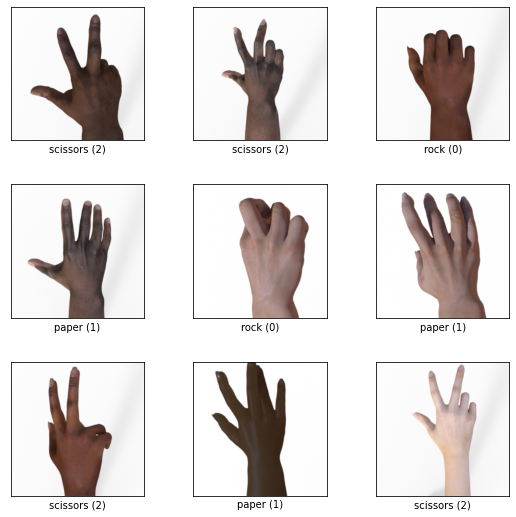

In [53]:
fig = tfds.show_examples(ds_train, info)

In [54]:
#Convertimos de tensorflow_datasets format a numpy format ya que es mas usado
#Tambien transformamos las imagenes a gris 
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
type (train_images)

numpy.ndarray

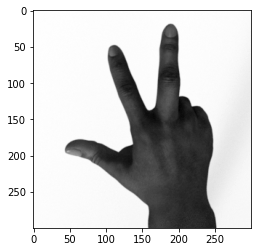

In [55]:
#Vemos un ejemplo
example_1 = [example['image'].numpy()[:,:,0] for example in ds_train]
plt.imshow(example_1[0], cmap="gray")
plt.show()

In [56]:
#Ahora transformamos los labels a numpy
train_labels = np.array([example['label'].numpy() for example in ds_train])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [57]:
print (train_images.shape)
print (test_images.shape)

(2520, 300, 300)
(372, 300, 300)


In [58]:
#Vamos a hacer un reshape ya que para utilizar keras necesitamos 3 canales (height, width, color)
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

In [59]:
#Transformamos a escala de 0 a 1, para un mejor entramiento de la red neuronal
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

In [60]:
#Vemos un ejemplo
train_images[0]

array([[[0.99607843],
        [0.99215686],
        [0.99607843],
        ...,
        [0.9843137 ],
        [0.98039216],
        [0.98039216]],

       [[0.99607843],
        [0.99607843],
        [0.99215686],
        ...,
        [0.98039216],
        [0.9843137 ],
        [0.9764706 ]],

       [[0.99607843],
        [0.99607843],
        [0.99607843],
        ...,
        [0.9843137 ],
        [0.98039216],
        [0.9882353 ]],

       ...,

       [[0.9882353 ],
        [0.9843137 ],
        [0.9882353 ],
        ...,
        [0.96862745],
        [0.9764706 ],
        [0.972549  ]],

       [[0.99215686],
        [0.99215686],
        [0.9843137 ],
        ...,
        [0.972549  ],
        [0.972549  ],
        [0.972549  ]],

       [[0.9882353 ],
        [0.99215686],
        [0.9882353 ],
        ...,
        [0.972549  ],
        [0.96862745],
        [0.98039216]]], dtype=float32)

### Creamos nuestra red neuronal

In [61]:
model = keras.Sequential([
   keras.layers.Input(shape = (300,300,1)),
   keras.layers.Conv2D(32, 3, strides = 2,  activation = 'relu'),
   keras.layers.Conv2D(64, 3, strides = 2, activation = 'relu'),
   keras.layers.Flatten(),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(train_images, train_labels, validation_data=(train_images, train_labels), epochs=10)

Epoch 1/10
 1/79 [..............................] - ETA: 2s - loss: 1.1039 - accuracy: 0.3750WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0160s vs `on_train_batch_end` time: 0.0273s). Check your callbacks.


79/79 [==============================] - 4s 50ms/step - loss: 1.2943 - accuracy: 0.7468 - val_loss: 0.1228 - val_accuracy: 0.9758
Epoch 2/10
79/79 [==============================] - 4s 48ms/step - loss: 0.0705 - accuracy: 0.9849 - val_loss: 0.0270 - val_accuracy: 0.9984
Epoch 3/10
79/79 [==============================] - 4s 48ms/step - loss: 0.0087 - accuracy: 0.9980 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 4/10
79/79 [==============================] - 4s 48ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 4.1457e-04 - val_accuracy: 1.0000
Epoch 5/10
79/79 [==============================] - 4s 48ms/step - loss: 8.7474e-04 - accuracy: 1.0000 - val_loss: 2.9611e-04 - val_accuracy: 1.0000
Epoch 6/10
79/79 [==============================] - 4s 48ms/step - loss: 4.3689e-04 - accuracy: 1.0000 - val_loss: 5.0530e-04 - val_accuracy: 1.0000
Epoch 7/10
79/79 [==============================] - 4s 49ms/step - loss: 4.6624e-04 - accuracy: 1.0000 - val_loss: 1.5082e-04 - val_accuracy: 1.0

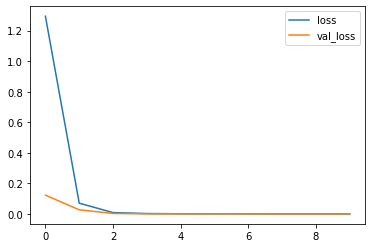

In [62]:
#Aca podemos observar como el valor de loss baja y no sube, esto quiere decir que no presenciamos un alto valor de overfitting 
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

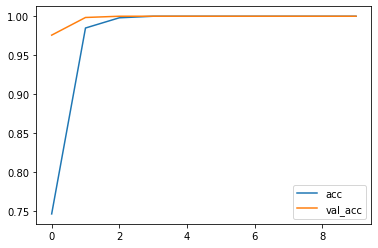

In [63]:
#Graficamos accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 75  25  24]
 [ 13 111   0]
 [ 14  42  68]]


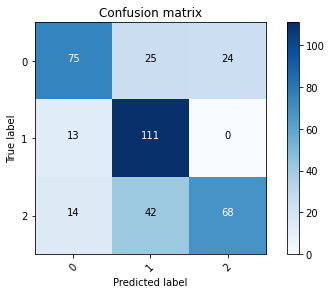

In [64]:
# Graficamos nuestra matriz de confusión
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(test_images).argmax(axis=1)
cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, list(range(3)))

In [73]:
labels = '''rock
paper
scissors'''.split()

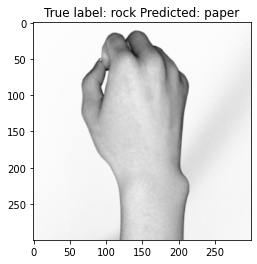

In [75]:
#Vemos alguna imagen al azar de las que predijo mal
test_images = test_images.reshape(372, 300, 300)
misclassified_idx = np.where(p_test != test_labels)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(test_images[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[test_labels[i]], labels[p_test[i]]));